In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
import random
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

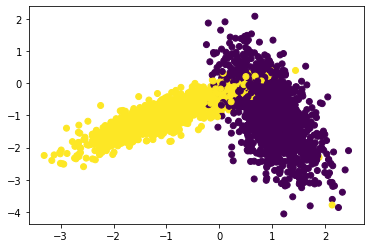

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
from sklearn.metrics import accuracy_score               
# x_train: its numpy array of shape, (n,d)
# y_train: its numpy array of shape, (n,) or (n,1)
# classifier: its typically KNeighborsClassifier()
# param_range: its a tuple like (a,b) a < b
# folds: an integer, represents number of folds we need to devide the data and test our model
def RandomSearchCV(x_train, y_train, classifier, param_range, folds):

  #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
  # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
  ten_random_values_for_param_range = sorted(random.sample(range(1, param_range), 10)) 
  train_scores = []
  test_scores = [] #
  #dict({hyper parmeter: [list of values]})
  #it will take classifier and set of values for hyper prameter in dict type
  classifier_params = { 'n_neighbors': ten_random_values_for_param_range }
  for k in tqdm(classifier_params['n_neighbors']):
    trainscores_folds = []
    testscores_folds = []

    #2.divide numbers ranging from  0 to len(x_train) into groups = folds
    #splitting the data into k groups (k = len(x_train) / folds)
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups:::group 1: 0-33, group 2:34-66, group 3: 67-100
    for i in range(0, folds):
      num_of_datapoints_in_each_fold = int(len(x_train) / folds)

      #3.for each hyperparameter that we generated in step 1:
      # cross-validation step:
      # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and test accuracies
      # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find train and test accuracies
      # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and test accuracies
      # based on the 'folds' value we will do the same procedure
      # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
      # find the mean of test accuracies of above 3 steps and store in a list "test_scores"

      # Compute 'fold':
      # Inner loop running for values of i (where i is num_of_total_fold of: 0, 1, 2, 3 ...)
      # each of the test_indices will have the data of a single fold(num_of_datapoints_in_each_fold) 
      # test_indices starting at num_of_datapoints_in_each_fold * i and ending at num_of_datapoints_in_each_fold * (i + 1)

      test_indices = list(set(list(range((num_of_datapoints_in_each_fold * i), (num_of_datapoints_in_each_fold*(i+1)))))) # And the whole rest of the indices of the dataset will be the train_indices
      # print('test_indices', test_indices)
      train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices) ) # print('train_indices ', train_indices)
      ''' Given 100 points, 

            test_indices  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

            train_indices  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]

            again in next loop

            test_indices  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
            train_indices  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
            '''

      x_train_fold = x_train[train_indices]
      y_train_fold = y_train[train_indices]
      x_test_fold = x_train[test_indices]
      y_test_fold = y_train[test_indices]
      
      #Depends on classifier, parameters will be:
      classifier.n_neighbors = k 
      classifier.fit(x_train_fold, y_train_fold)   
      
      #Append the accuracy score in testscores_folds:
      y_predicted = classifier.predict(x_test_fold)
      testscores_folds.append(accuracy_score(y_test_fold, y_predicted))
      
      #Append the accuracy score in trainscores_folds:
      y_predicted = classifier.predict(x_train_fold)
      trainscores_folds.append(accuracy_score(y_train_fold, y_predicted))

    train_scores.append(np.mean(np.array(trainscores_folds)))
    test_scores.append(np.mean(np.array(testscores_folds)))

  return train_scores, test_scores, classifier_params   #4. return both "train_scores" and "test_scores"


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# As classifier is KNN:
classifier = KNeighborsClassifier()
params_range = 50
folds = 3

# call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
testscores, trainscores, params = RandomSearchCV(X_train, y_train, classifier, params_range, folds)

print('trainscores are: ', trainscores)
print('testscores are: ', testscores)

100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

trainscores are:  [0.9495999999999999, 0.9544, 0.9541333333333334, 0.9541333333333334, 0.9538666666666668, 0.9546666666666667, 0.9561333333333333, 0.9556, 0.9561333333333334, 0.9558666666666666]
testscores are:  [0.9624666666666667, 0.9588666666666666, 0.9572666666666666, 0.9575999999999999, 0.9573999999999999, 0.9575333333333332, 0.9580000000000001, 0.9579333333333334, 0.9579333333333334, 0.9581333333333334]


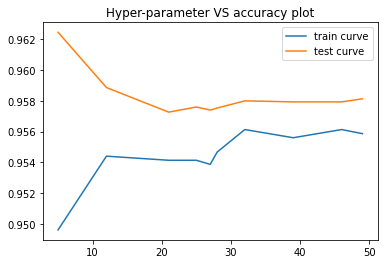

In [5]:
# 6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
plt.plot(params['n_neighbors'], trainscores, label='train curve')
plt.plot(params['n_neighbors'], testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [6]:
# 7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook
def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

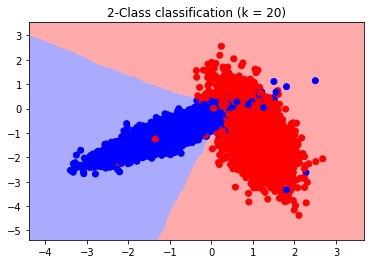

In [8]:
#plotting the decision boundaries for the model initialized with the best hyperparameter (20)
neigh = KNeighborsClassifier(n_neighbors = 20)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)